In [2]:
# General imports

import os
import math
import matplotlib
import seaborn
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
from scipy.interpolate         import interp1d
from scipy                     import interpolate
from collections               import OrderedDict
from matplotlib                import cm
from matplotlib.colors         import ListedColormap, LinearSegmentedColormap
from matplotlib.lines          import Line2D
from matplotlib.patches        import Patch, Ellipse, Rectangle
from matplotlib.legend_handler import HandlerPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import Normalize
# matplotlib inline
# config InlineBackend.figure_format='retina'

# =============================================================================
# The sole purpose of this file is to enforce my custom matplotlib settings
# =============================================================================

# Tom's matplotlib preamble settings (adopted from 'mp3_nozzle_experiment_18032022.ipynb')

fontsize = 17 # 14
hwidth =  1.25; length = 5
plt.rc('text', usetex = True)
plt.rc('text.latex', preamble = r'\usepackage{amsmath}')

# inspired by http://nipunbatra.github.io/2014/08/latexify/

linestyles_dict = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

params = {
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    #'image.cmap': 'gray',
    #'axes.grid': False,
    'savefig.dpi': 300, # 150, to adjust notebook inline plot size
    'axes.labelsize': fontsize, # fontsize for x and y labels (was 10)
    'axes.titlesize': fontsize,
    'font.size': fontsize, # was 10
    'legend.fontsize': fontsize, #16, # was 10
    'legend.title_fontsize': fontsize,
    'legend.columnspacing': 0.5, 
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': True,
    # 'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
    #
    'axes.linewidth': hwidth,
    'xtick.major.width': hwidth,
    'ytick.major.width': hwidth,
    'ytick.major.size': length,
    'xtick.major.size': length,
    'xtick.direction': "in",
    'ytick.direction': "in",
    'xtick.top': True,
    'xtick.bottom': True,
    'ytick.left': True,
    'ytick.right': True,
    'grid.alpha': 0.6, # transparency, between 0.0 and 1.0
    'grid.linewidth': 0.7 * hwidth, # in points
    #
    'legend.edgecolor': '0',
    'legend.labelspacing': 0.3,
    'axes.edgecolor': 'black',
    'legend.fancybox': False,
    'patch.linewidth': hwidth,
    'legend.facecolor': 'white',
    'legend.framealpha': 1,
    #
    'lines.markersize': 8,
    'lines.markeredgewidth': 1.5,
    'savefig.bbox': 'tight',
    'figure.autolayout': True,
}

matplotlib.rcParams.update(params)

# COLOURS - MATLAB defaults 

blue = (0, 0.4470, 0.7410); orange = (0.8500, 0.3250, 0.0980); yellow = (0.9290, 0.6940, 0.1250);
purple = (0.4940, 0.1840, 0.5560); green = (0.4660, 0.6740, 0.1880); lblue = (0.3010, 0.7450, 0.9330);
red = (0.6350, 0.0780, 0.1840); black = (0, 0, 0); dgrey = (0.25, 0.25, 0.25);
grey = (0.5, 0.5, 0.5); lgrey = (0.75, 0.75, 0.75);

rob_blue_rgb     = '#0072BD' # (0, 114, 189) # shade of blue of Rob's PowerPoint template
whittle_blue_rgb = '#0BACD7' # (11, 172, 215) # shade of blue of Whittle logo

# PLOTTING AIDS 

#linS = {'-','--',':','-.'}; #MarkerS = {'x','o','s','+','.','^','d','*','_','|','v','>','<','p','h'};

In [3]:
%matplotlib inline
from PySide2.QtWidgets import *
from datetime import date
print("Running date:", date.today().strftime("%B %d, %Y"))
# Add cloned repo to system path to avoid having to pip-install as well
import sys
sys.path.insert(0, "C:/Users/nmb48/Documents/GitHub/pyleecan")
import pyleecan
print("Pyleecan version:" + pyleecan.__version__)
import SciDataTool
print("SciDataTool version:" + SciDataTool.__version__)

Running date: June 03, 2025
Pyleecan version:1.5.2
SciDataTool version:2.5.0


In [4]:
# %run -m pyleecan

(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot: title={'center': "Detailed demonstrator design from chapter 5 of Aidan's thesis"}, xlabel='Position along x-axis [m]', ylabel='Position along y-axis [m]'>)

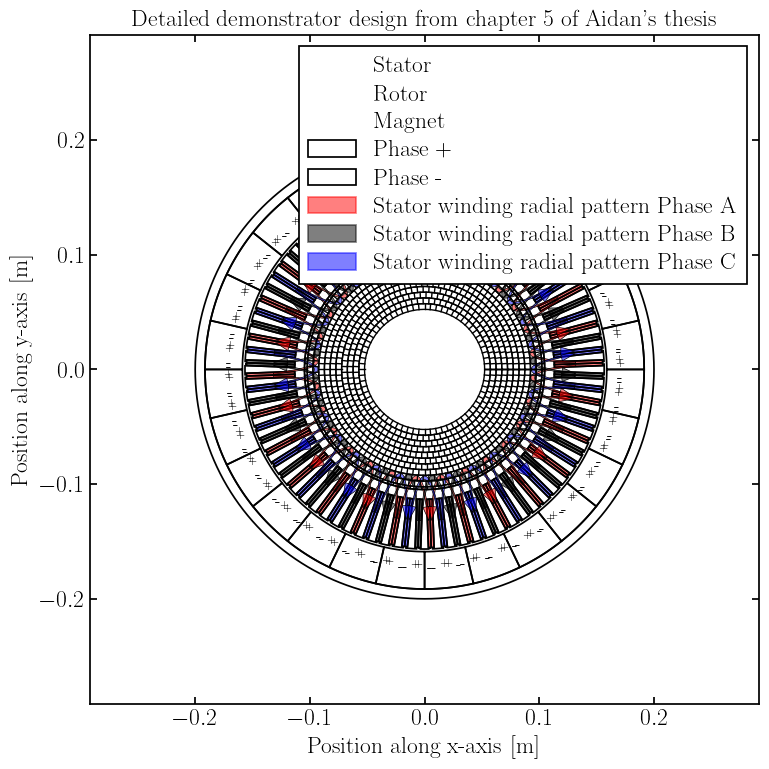

In [6]:
%matplotlib inline
import json
from pyleecan.Functions.load import load
from os.path import abspath, dirname, basename, join, normpath, realpath
from nils.conventional_propulsive_motor.plot_lattice_hex import plot_lattice_hex

conventional_propulsive_motor = load(join("conventional_propulsive_motor_populated.json"))
with open("conventional_propulsive_motor.json", "r") as file:
    conventional_propulsive_motor_dict = json.load(file)

fig_mach, ax_mach = conventional_propulsive_motor.plot(is_show_fig=False, is_winding_connection=True)
plot_lattice_hex(
    fig=fig_mach,
    ax=ax_mach,
    r_in=conventional_propulsive_motor_dict['stator']['R_hex_in'],  # inner radius [m]
    r_out=conventional_propulsive_motor_dict['stator']['Rint'],  # outer radius [m]
    h=conventional_propulsive_motor_dict['stator']['a'],  # radial spacing (ring thickness) [m]
    w=conventional_propulsive_motor_dict['stator']['a'],  # desired arc width in each ring [m]
    d=conventional_propulsive_motor_dict['stator']['d']  # mean strut thickness [m]
)

In [7]:
print(conventional_propulsive_motor_dict.keys())

dict_keys(['stator', 'rotor', 'shaft', 'frame', 'tms', 'operation'])


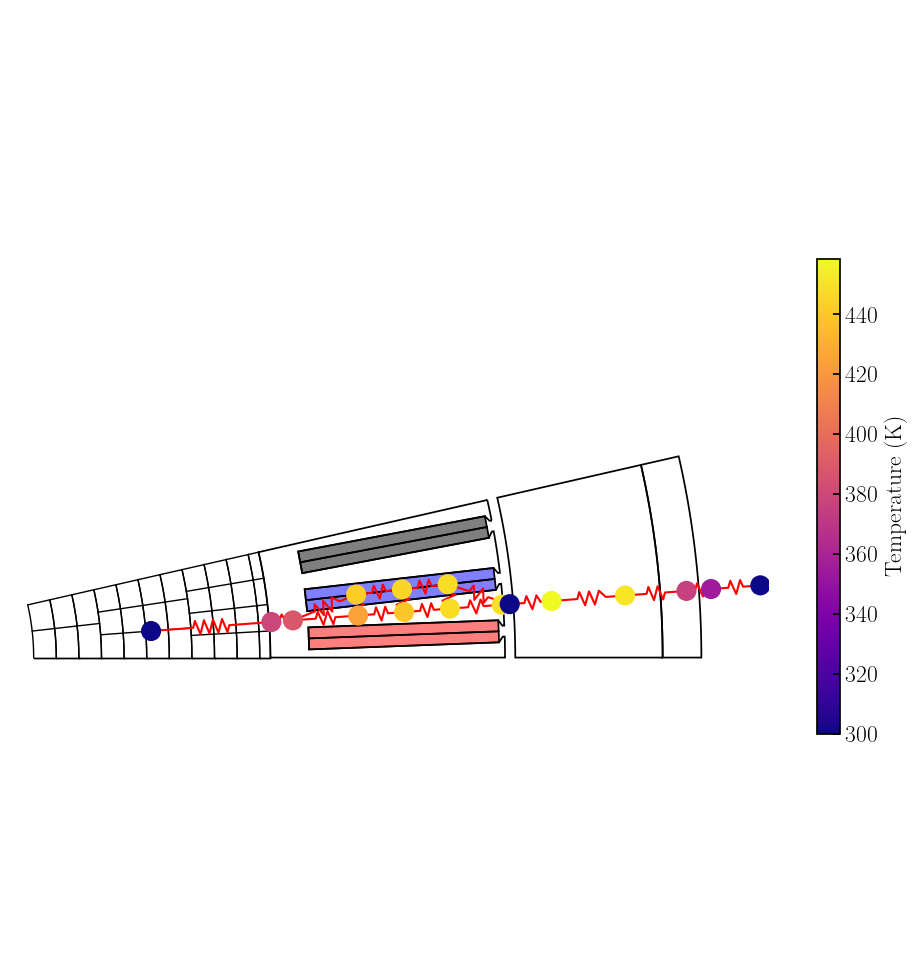

In [8]:
%matplotlib inline
from pyleecan.Functions.load import load
from os.path import abspath, dirname, basename, join, normpath, realpath
from nils.conventional_propulsive_motor.draw_zigzag import draw_zigzag
from nils.conventional_propulsive_motor.plot_lattice_hex import plot_lattice_hex

conventional_propulsive_motor = load(join("conventional_propulsive_motor_populated.json"))

n_pr = conventional_propulsive_motor_dict['rotor']['slot']['Zs']  # number of rotor poles
fig_mach, ax_mach = conventional_propulsive_motor.plot(is_show_fig=False, sym=n_pr, fig_title=None, win_title=None, is_winding_connection=False)

plot_lattice_hex(
    fig=fig_mach,
    ax=ax_mach,
    r_in=conventional_propulsive_motor_dict['stator']['R_hex_in'],  # inner radius [m]
    r_out=conventional_propulsive_motor_dict['stator']['Rint'],  # outer radius [m]
    h=conventional_propulsive_motor_dict['stator']['a'],  # radial spacing (ring thickness) [m]
    w=conventional_propulsive_motor_dict['stator']['a'],  # desired arc width in each ring [m]
    d=conventional_propulsive_motor_dict['stator']['d'],  # mean strut thickness [m]
    angle_start=0,  # start angle (in radians)
    angle_end=2 * np.pi/n_pr,  # end angle (in radians)
)

ax_mach.set_aspect('equal')
ax_mach.set_xticks([])
ax_mach.set_yticks([])
ax_mach.axis('off')
ax_mach.get_legend().remove()
ax_mach.set_title("")

with open("conventional_propulsive_motor.json", "r") as file:
    conventional_propulsive_motor_dict = json.load(file)

Ts = conventional_propulsive_motor_dict['tms']['Temperatures']
node_coords = conventional_propulsive_motor_dict['tms']['Coordinates']
connections = conventional_propulsive_motor_dict['tms']['Connections']

node_coords = np.array(node_coords)
x = node_coords[:, 0]
y = node_coords[:, 1]

for (i, j) in connections:
    draw_zigzag(ax_mach, node_coords[i], node_coords[j], pitch=0.0005, amplitude=0.0015, fraction_zigzag=0.3, color='red')
c1=ax_mach.scatter(x, y, c=Ts, s=175, zorder=20, cmap='plasma')
fig_mach.colorbar(c1, ax=ax_mach, label="Temperature (K)", shrink=0.5, anchor=(0, 0.475))

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig_mach.set_size_inches(10, 10)
ax_mach.set_xlim(conventional_propulsive_motor_dict['stator']['R_hex_in'] * 0.9, conventional_propulsive_motor.rotor.Rext * 1.075)
ax_mach.set_ylim(0, conventional_propulsive_motor.rotor.Rext * np.sin(np.pi/2/4))
# plt.savefig('trn_opt_conv.png', format='png', dpi=600)
plt.savefig('trn_opt_conv.svg', format='svg')
# plt.show()

In [9]:
from os.path import join
from numpy import ones, pi, array, linspace, cos, sqrt
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.OPdq import OPdq
from pyleecan.Classes.MagFEMM import MagFEMM

# Create the Simulation
simu_femm = Simu1(name="FEMM_simulation", machine=conventional_propulsive_motor)

# ###
# simu_femm.machine.sym = 8
# ###

# simu_femm.path_result = "path/to/folder" Path to the Result folder to use (will contain FEMM files)
p = simu_femm.machine.stator.winding.p
qs = simu_femm.machine.stator.winding.qs

# Defining Simulation Input
simu_femm.input = InputCurrent()

# Rotor speed [rpm]
# N0 = 12500 
N0 = conventional_propulsive_motor_dict['operation']['omm'] * 60/np.pi  # [rpm]
simu_femm.input.OP = OPdq(N0=N0)

# time discretization [s]
time = linspace(start=0, stop=60/N0, num=32*p, endpoint=False) # 32*p timesteps
simu_femm.input.time = time 

# Angular discretization along the airgap circonference for flux density calculation
# simu_femm.input.angle = linspace(start = 0, stop = 2*pi, num=2048, endpoint=False) # 2048 steps 
simu_femm.input.angle = linspace(start = 0, stop = 2*pi, num=n_pr*100, endpoint=False)  # has to be multiple of n_pr, else get 'In Magnetic model, Na_tot=2048 is not divisible by the machine angular periodicity (14). Angular periodicity removed' (originally set to 2048 steps)

# Stator currents as a function of time, each column correspond to one phase [A]
# I0_rms = 103.96/sqrt(2)
I0_rms = conventional_propulsive_motor_dict['operation']['I']/np.sqrt(2)
felec = p * N0 /60 # [Hz]
rot_dir = simu_femm.machine.stator.comp_mmf_dir()
Phi0 = 140*pi/180  # Maximum Torque Per Amp

Ia = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 0 * rot_dir * 2 * pi / qs + Phi0)
)
Ib = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 1 * rot_dir * 2 * pi / qs + Phi0)
)
Ic = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 2 * rot_dir * 2 * pi / qs + Phi0)
)
simu_femm.input.Is = array([Ia, Ib, Ic]).transpose()

In [10]:
from pyleecan.Classes.MagFEMM import MagFEMM

simu_femm.mag = MagFEMM(
    type_BH_stator=0, # 0 to use the material B(H) curve, 
                      # 1 to use linear B(H) curve according to mur_lin,
                      # 2 to enforce infinite permeability (mur_lin =100000)
    type_BH_rotor=0,  # 0 to use the material B(H) curve, 
                      # 1 to use linear B(H) curve according to mur_lin,
                      # 2 to enforce infinite permeability (mur_lin =100000)
    file_name = "conventional_propulsive_motor_femm", # Name of the file to save the FEMM model
    is_fast_draw=True,  # Speed-up drawing of the machine by using lamination periodicity
    is_sliding_band=True,  # True to use the symetry of the lamination to draw the machine faster
    # is_sliding_band=False,  # True to use the symetry of the lamination to draw the machine faster
    is_calc_torque_energy=True, # True to calculate torque from integration of energy derivate over rotor elements
    T_mag=60,  # Permanent magnet temperature to adapt magnet remanent flux density [°C]
    is_remove_ventS=False,  # True to remove stator ventilation duct
    is_remove_ventR=False,  # True to remove rotor ventilation duct
)

# Only the magnetic module is defined
simu_femm.elec = None
simu_femm.force = None
simu_femm.struct = None 

In [11]:
simu_femm.mag.is_periodicity_a=True
# simu_femm.mag.is_periodicity_a=False
simu_femm.mag.is_periodicity_t=True
# simu_femm.mag.is_periodicity_t=False
simu_femm.mag.nb_worker = 4  # Number of FEMM instances to run at the same time (1 by default)
simu_femm.mag.is_get_meshsolution = True # To get FEA mesh for latter post-procesing
simu_femm.mag.is_save_meshsolution_as_file = False # To save FEA results in a dat file
out_femm = simu_femm.run()

[22:01:10] Starting running simulation FEMM_simulation (machine=Detailed demonstrator design from chapter 5 of Aidan's thesis)
[22:01:10] Starting Magnetic module
[22:01:13] Computing Airgap Flux in FEMM
[22:01:25] End of simulation FEMM_simulation


Warning: VTK requires 3D points, but 2D points given. Appending 0 third component.

({'triangle': array([[0.000e+00, 1.000e+00, 2.000e+00],
       [2.000e+00, 1.000e+00, 4.000e+00],
       [3.000e+00, 4.000e+00, 1.000e+00],
       ...,
       [1.958e+03, 1.920e+03, 1.956e+03],
       [1.942e+03, 1.943e+03, 1.954e+03],
       [1.958e+03, 1.953e+03, 1.952e+03]])}, 3470, {'triangle': array([   0,    1,    2, ..., 3467, 3468, 3469])})


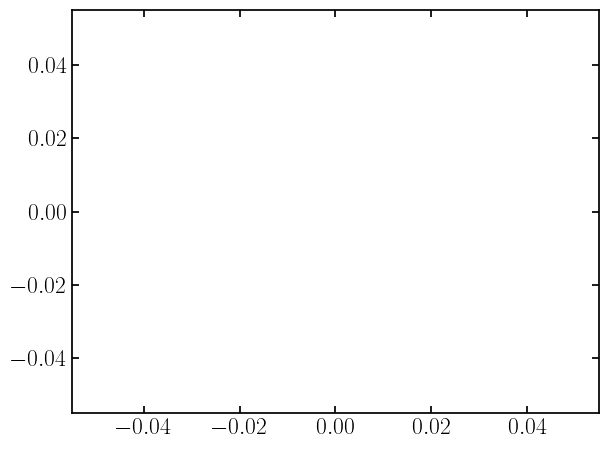

In [12]:
from scipy.interpolate import griddata

mesh = out_femm.mag.meshsolution.mesh
nodes = mesh.node
x = nodes.get_coord(nodes.indice)[:, 0]
y = nodes.get_coord(nodes.indice)[:, 1]
elements_tuple = mesh.get_element()
elements = elements_tuple[0]["triangle"].astype(int)  # connectivity for triangles is in the first element of the tuple
flux_density = out_femm.mag.meshsolution.get_mesh_field_pv()[1]
B_mag = np.linalg.norm(flux_density, axis=1).flatten()

sector_angle = 360 / n_pr
theta = np.linspace(0, sector_angle * np.pi/180, 360)
R_coil = 0.1
x_line = R_coil * np.cos(theta)
y_line = R_coil * np.sin(theta)

# print(mesh_points, B_mag, x_line, y_line)
# print(np.shape(x), np.shape(y), np.shape(x_line), np.shape(y_line), np.shape(B_mag))
print(elements_tuple)
# B_line = griddata((x, y), B_mag, (x_line, y_line), method='linear')

centroids_x = np.mean(x[elements], axis=1)
centroids_y = np.mean(y[elements], axis=1)
integration_points = np.column_stack((centroids_x, centroids_y))

B_mag_circle = griddata((centroids_x, centroids_y), B_mag, (x_line, y_line), method='linear')
# print(B_rad_circle)
# B_tan_circle = griddata((centroids_x, centroids_y), B_tan, (x_circle, y_circle), method='linear')
# B_magnitude_circle = griddata((centroids_x, centroids_y), B_magnitude, (x_circle, y_circle), method='linear')

fig, ax = plt.subplots()
# ax.plot(theta, B_rad_circle)

theta_org = theta
theta_circ = [theta]
for i in range(n_pr - 1):
    start_value = theta[-1]
    theta = start_value + theta_org
    theta_circ.append(theta)
theta_circ = np.array(theta_circ).flatten()

ax.plot(theta_circ, np.tile(B_mag_circle, n_pr))
plt.show()

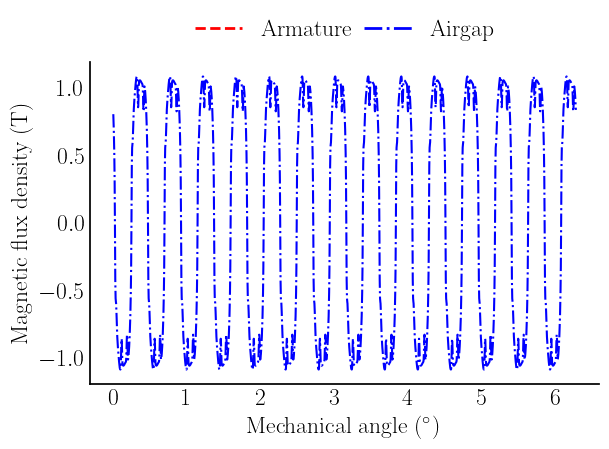

In [13]:
from pyleecan.Functions.Plot import dict_2D

dict_2D['color_list'] = ['blue']
dict_2D['linestyles'] = ['-.']

fig, ax = plt.subplots()

ax.tick_params(axis='x', top=False)
ax.tick_params(axis='y', right=False)
ax.tick_params(axis='x', top=False, bottom=False)
ax.tick_params(axis='y', right=False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='y', which='minor', right=False)
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Pass axis settings to plot_2D_Data()
dict_2D['fig'] = fig
dict_2D['ax'] = ax

ax.plot(theta_circ, np.tile(B_mag_circle, n_pr), label='Armature', color='red', linestyle='--')
# Radial magnetic flux 
out_femm.mag.B.plot_2D_Data(
    "angle","time[1]", "Airgap",component_list=["radial"], is_show_fig=False, **dict_2D, is_grid=False, is_disp_title=False
)
ax.set_xlabel('Mechanical angle ($^\circ$)')
ax.set_ylabel('Magnetic flux density (T)')
# ax.legend(frameon=False, ncol=3, loc='lower center', bbox_to_anchor=(0.5, 1))

# Create custom legend
armature_handle = Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Armature')
airgap_handle = Line2D([0], [0], color='blue', linestyle='-.', linewidth=2, label='Airgap')
ax.legend(handles=[armature_handle, airgap_handle], 
    frameon=False, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2
)

plt.show()

# Tangential magnetic flux 
# out_femm.mag.B.plot_2D_Data("angle","time[1]",component_list=["tangential"], is_show_fig=False)

['VERSION', '_FrozenClass__isfrozen', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_desc', '_frame', '_freeze', '_get_desc', '_get_frame', '_get_logger_name', '_get_name', '_get_rotor', '_get_shaft', '_get_stator', '_get_type_machine', '_logger_name', '_name', '_rotor', '_set_None', '_set_desc', '_set_frame', '_set_logger_name', '_set_name', '_set_rotor', '_set_shaft', '_set_stator', '_set_type_machine', '_shaft', '_stator', '_type_machine', 'as_dict', 'build_geometry', 'check', 'comp_Rgap_mec', 'comp_angle_rotor_initial', 'comp_desc_dict', 'comp_length_airgap_active', 'comp_masses', 'comp_output_geo', 'comp_periodicity_spatial', 'comp_periodicity_time', 'comp_width_airgap_mag', 'comp_width_

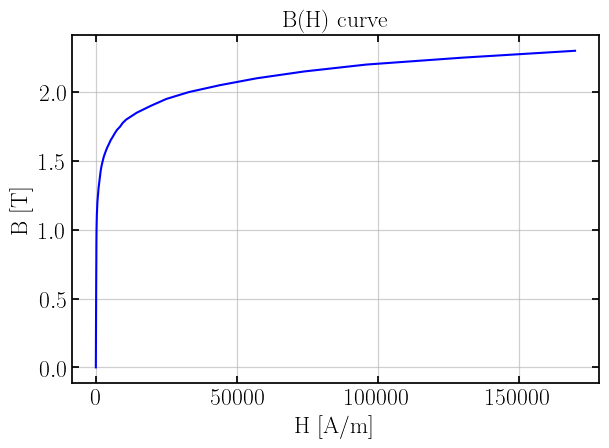

In [14]:
# print(dir(conventional_propulsive_motor.rotor.magnet))
print(dir(conventional_propulsive_motor))
fig = conventional_propulsive_motor.stator.mat_type.mag.plot_BH(color="b", is_show_fig=False)
# fig = conventional_propulsive_motor.rotor.mag.plot_BH(is_show_fig=False)

C:\Users\nmb48\AppData\Local\Temp\ipykernel_33884\589871157.py:100: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('conv_motor_geometry_tang_field_geometry.svg', format='svg')
C:\Users\nmb48\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


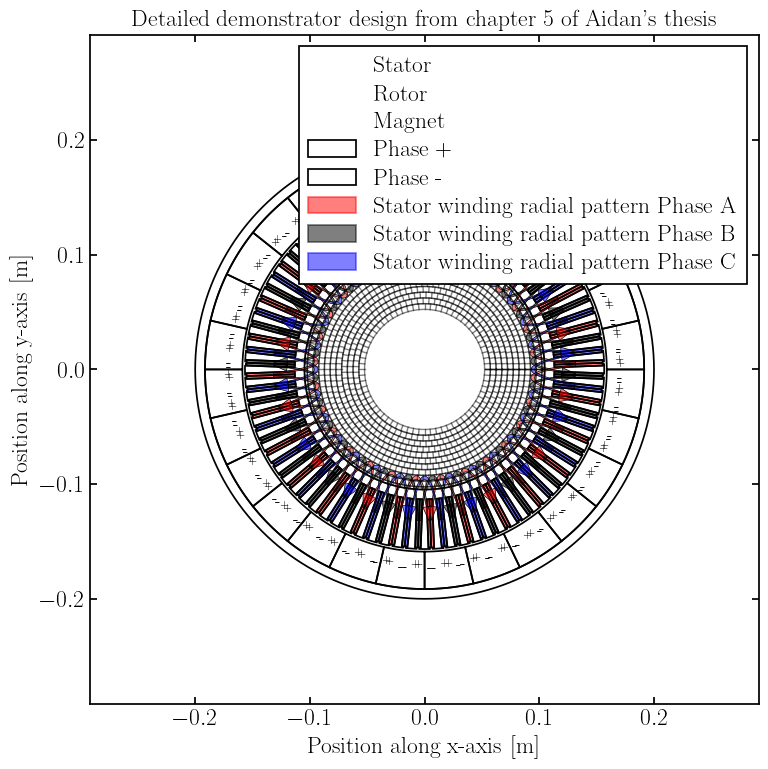

In [20]:
# %matplotlib qt
%matplotlib inline

import sys
import json
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.patches as patches
import matplotlib.colors as mcolors
from matplotlib import gridspec

from nils.conventional_propulsive_motor.plot_lattice_hex import plot_lattice_hex
#'''
def rotate_points(x, y, angle_deg):
    """Rotate points (x, y) by a given angle in degrees."""
    angle_rad = np.deg2rad(angle_deg)
    x_rot = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_rot = x * np.sin(angle_rad) + y * np.cos(angle_rad)
    return x_rot, y_rot

# Retrieve node data
mesh = out_femm.mag.meshsolution.mesh
nodes = mesh.node
x = nodes.get_coord(nodes.indice)[:, 0]
y = nodes.get_coord(nodes.indice)[:, 1]

# Retrieve connectivity data
elements_tuple = mesh.get_element()
elements = elements_tuple[0]["triangle"]  # connectivity for triangles is in the first element of the tuple

# Retrieve colour map data (flux density)
# out_femm.mag.meshsolution.get_field()  # this only returns the first element
flux_density = out_femm.mag.meshsolution.get_mesh_field_pv()[1]
B_magnitude = np.linalg.norm(flux_density, axis=1).flatten()
B_rad = flux_density[:, 0].flatten()
B_tan = flux_density[:, 1].flatten()

# Create matplotlib triangulation
triangulation = tri.Triangulation(x, y, elements)
#'''
# Create figure
fig_comb, ax_comb = plt.subplots(tight_layout=True, figsize=(8, 8))
#'''
# Plot 16 sectors of flux density FEA result to complete 360 degrees
sector_angle = 360 / n_pr

for i in range(n_pr):
    # Rotate mesh points
    x_rot, y_rot = rotate_points(x, y, i * sector_angle)

    # Offset element indices for new sector
    element_offset = i * len(x)
    elements_rot = elements + element_offset

    # Append new points and triangles
    triangulation = tri.Triangulation(np.tile(x_rot, i + 1), np.tile(y_rot, i + 1), np.vstack([elements_rot]))

    # Plot each sector
    c = ax_comb.tripcolor(triangulation, facecolors=B_tan, shading="flat", cmap="bwr", alpha=1, edgecolors="k", linewidth=0.0)
#'''
# Plot default cross-section with stator winding radial pattern
conventional_propulsive_motor.plot(fig=fig_comb, ax=ax_comb, is_show_fig=False, edgecolor='black', is_winding_connection=True)
#'''
# Add colour bar for flux density
fig_comb.colorbar(c, ax=ax_comb, label="Tangential magnetic flux density (T)", shrink=0.6, anchor=(0,0.475))
ax_comb.set_aspect('equal')
ax_comb.set_xticks([])
ax_comb.set_yticks([])
ax_comb.axis('off')
#'''
# Plot lattice heat exchanger
# NOTE: have to use conventional_propulsive_motor.json, NOT conventional_propulsive_motor_populated.json,
# since the latter does not allow for 'R_hex_in', 'a', and 'd' attributes
with open("conventional_propulsive_motor.json", "r") as file:
    conventional_propulsive_motor_dict = json.load(file)
plot_lattice_hex(
    fig_comb,
    ax_comb,
    r_in=conventional_propulsive_motor_dict['stator']['R_hex_in'],  # inner radius [m]
    r_out=conventional_propulsive_motor_dict['stator']['Rint'],  # outer radius [m]
    h=conventional_propulsive_motor_dict['stator']['a'],  # radial spacing (ring thickness) [m]
    w=conventional_propulsive_motor_dict['stator']['a'],  # desired arc width in each ring [m]
    d=conventional_propulsive_motor_dict['stator']['d'],  # mean strut thickness [m]
    alpha=0.5
)

#'''
# Add custom legend
red_patch = patches.Patch(facecolor='red', edgecolor='black', label="Phase A", alpha=1)
black_patch = patches.Patch(facecolor='black', edgecolor='black', label="Phase B", alpha=1)
blue_patch = patches.Patch(facecolor='blue', edgecolor='black', label="Phase C", alpha=1)
ax_comb.legend(handles=[
        red_patch, black_patch, blue_patch,
    ], frameon=False, loc='upper center', ncol=3, bbox_to_anchor=(0.51,0.97)
)

ax_comb.set_title("")
#'''
# plt.savefig('conv_motor_geometry_tang_field.png', format='png', dpi=600)
plt.savefig('conv_motor_geometry_tang_field_geometry.svg', format='svg')
# plt.show()

In [ ]:
out_femm.mag.meshsolution.plot_contour(label="B", clim=[0,3])